# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/UTDSBA/Supervised_Learning_Foundations/Project_3_Recell/used_device_data.csv')

## Data Overview

###**Observations**

In [4]:
#first 5 row of the data set
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
#last 5 rows of the data
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [6]:
#size of the data set
data.shape

(3454, 15)

In [7]:
#data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [8]:
#statistical summary
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


In [9]:
#checking for the duplicate values
data.duplicated().sum()

0

In [10]:
#checking for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

####Observations

*   The data set has 15 columns or attributes that contains 3454 rows of data for each individual device.
*   There are 9 float, 2 int and 4 string data type in the dataset.
*   There are no duplicate values.
*   There are total of 6 columns which have missing values.

####Observations on Statistical data
*   As stated in the problem statement target variable is "normalized used price"
*   The minimun normalized used price is 1.54 and the maximum is 6.62 with an average price of 4.37
*   Android is the most popular os in as per the dataset.

In [17]:
#copy of the data frame
data_1 = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

###Univariate Analysis:

In [20]:
def hist_box(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median

In [15]:
# function to create labeled barplots


def label_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()  # show the plot

**`brand_name`**

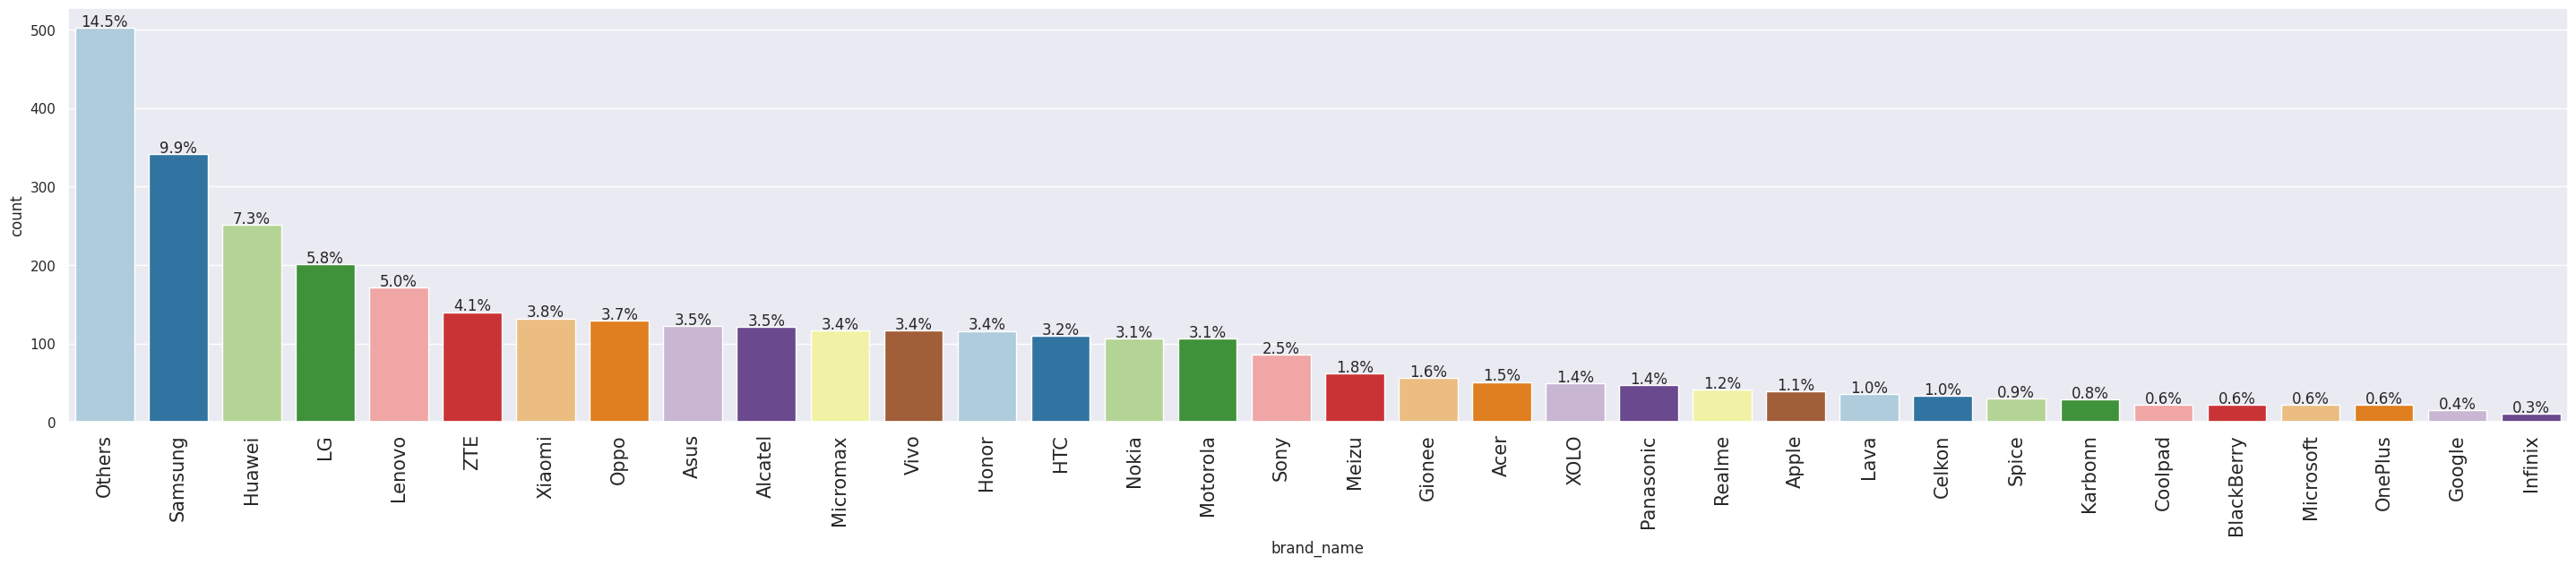

In [23]:
label_barplot(data_1,"brand_name", perc=True)

**`os`**

**Question:2** What percentage of the used device market is dominated by Android devices?

**Answer:2** Almost 94% of the market is dominated by android devices.

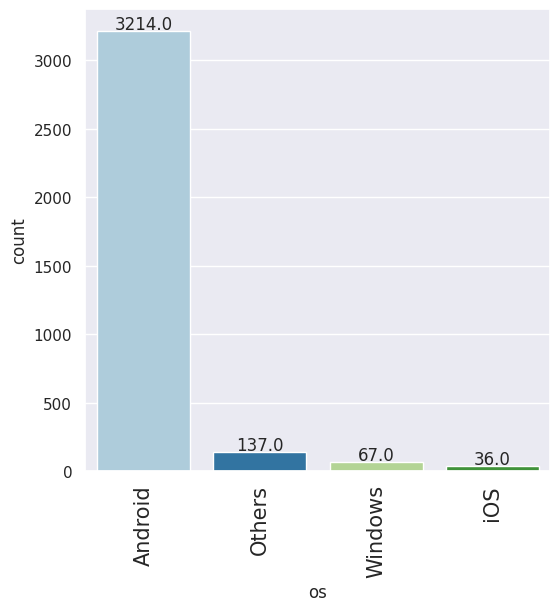

In [24]:
label_barplot(data_1,"os")

**`screen_size`**



*   The distribution of the screen size is slighlty right skewed with a median is just shy of 14 cm



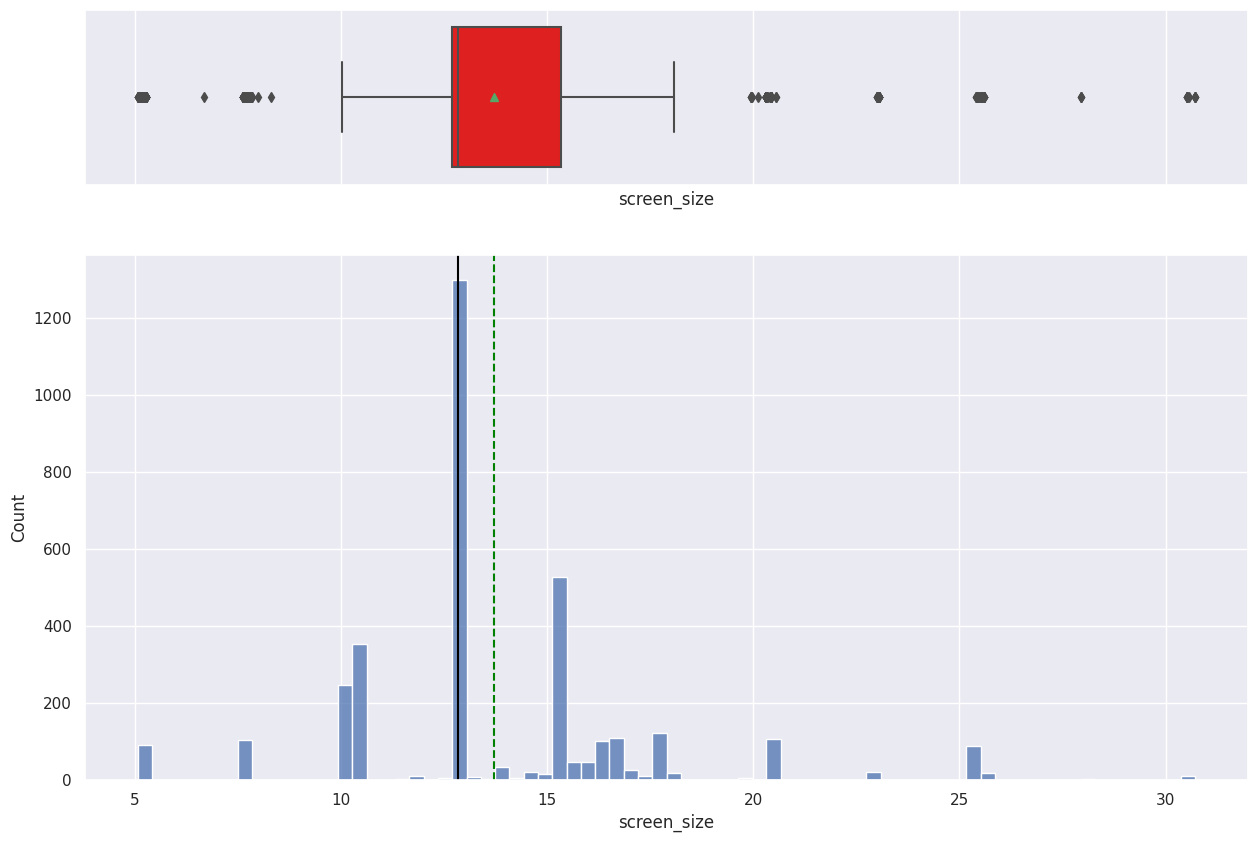

In [26]:
hist_box(data_1,"screen_size")

**`4g`**

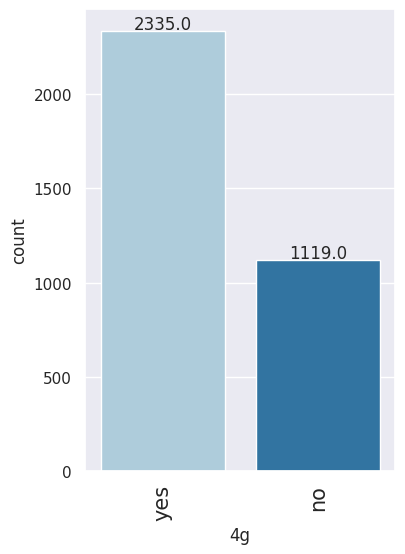

In [27]:
label_barplot(data_1,"4g")

**`5g`**

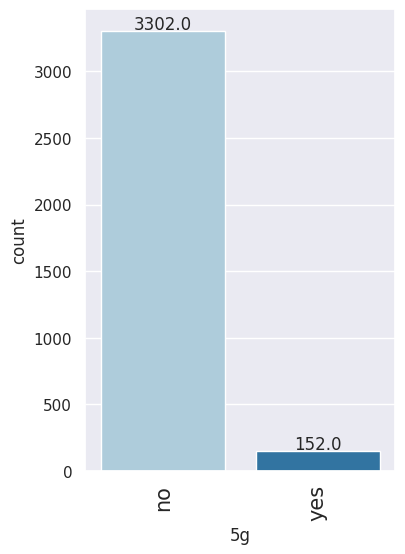

In [28]:
label_barplot(data_1,"5g")

**`main_camera_mp`**

It is visible from the barplot and histogram that the mega pixel for the main camera is rigth skewed with couple of outliers.
Median is slightly less than 10 megapixels.

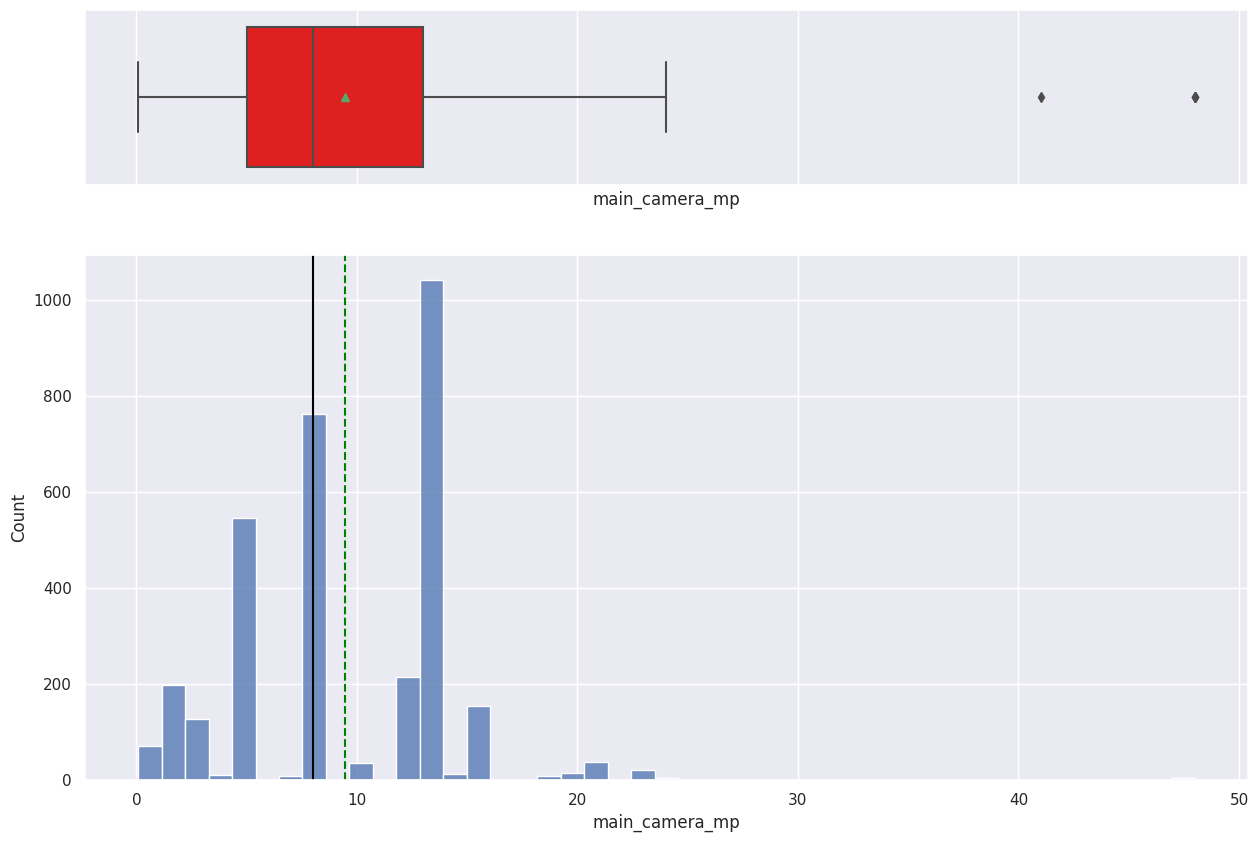

In [29]:
hist_box(data_1,"main_camera_mp")

**`selfi_camera_mp`**

The distribution of the front camera is slightly right skewed with 5 outliers

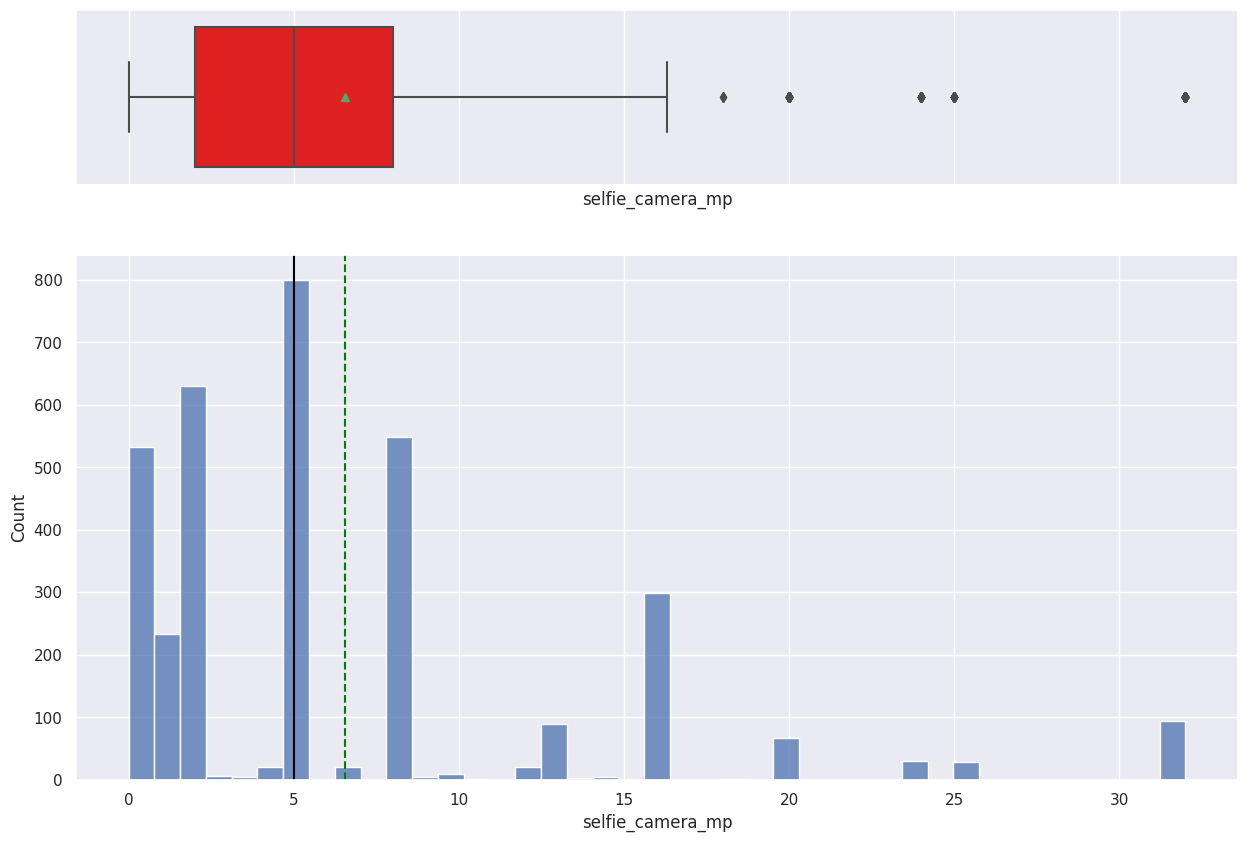

In [31]:
hist_box(data_1,"selfie_camera_mp")

**`int_memory`**

The distribution for the internal memory is right skewed and almost all devices have less 200 gb of memory

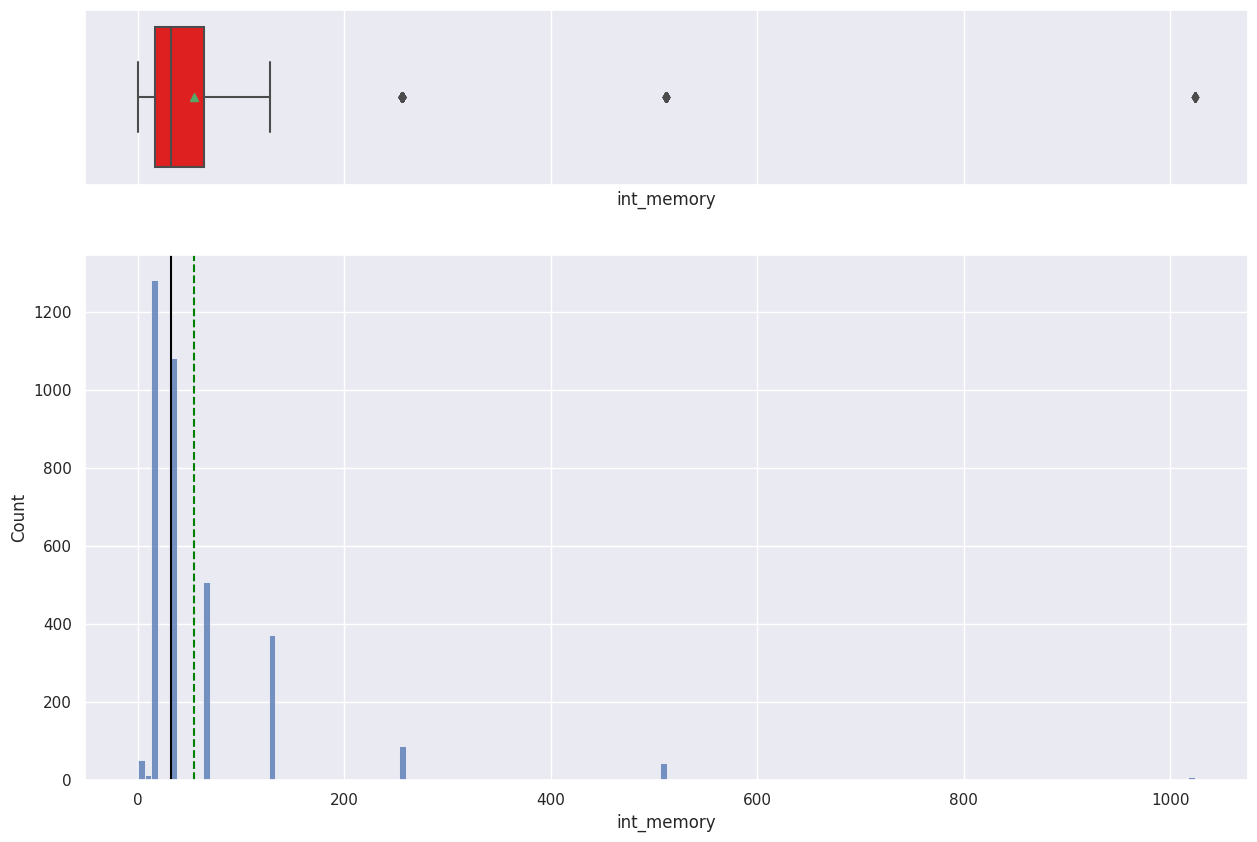

In [32]:
hist_box(data_1,"int_memory")

**`ram`**

Distribution for the ram meomory is normal with almost all the devices having 4 GB of ram

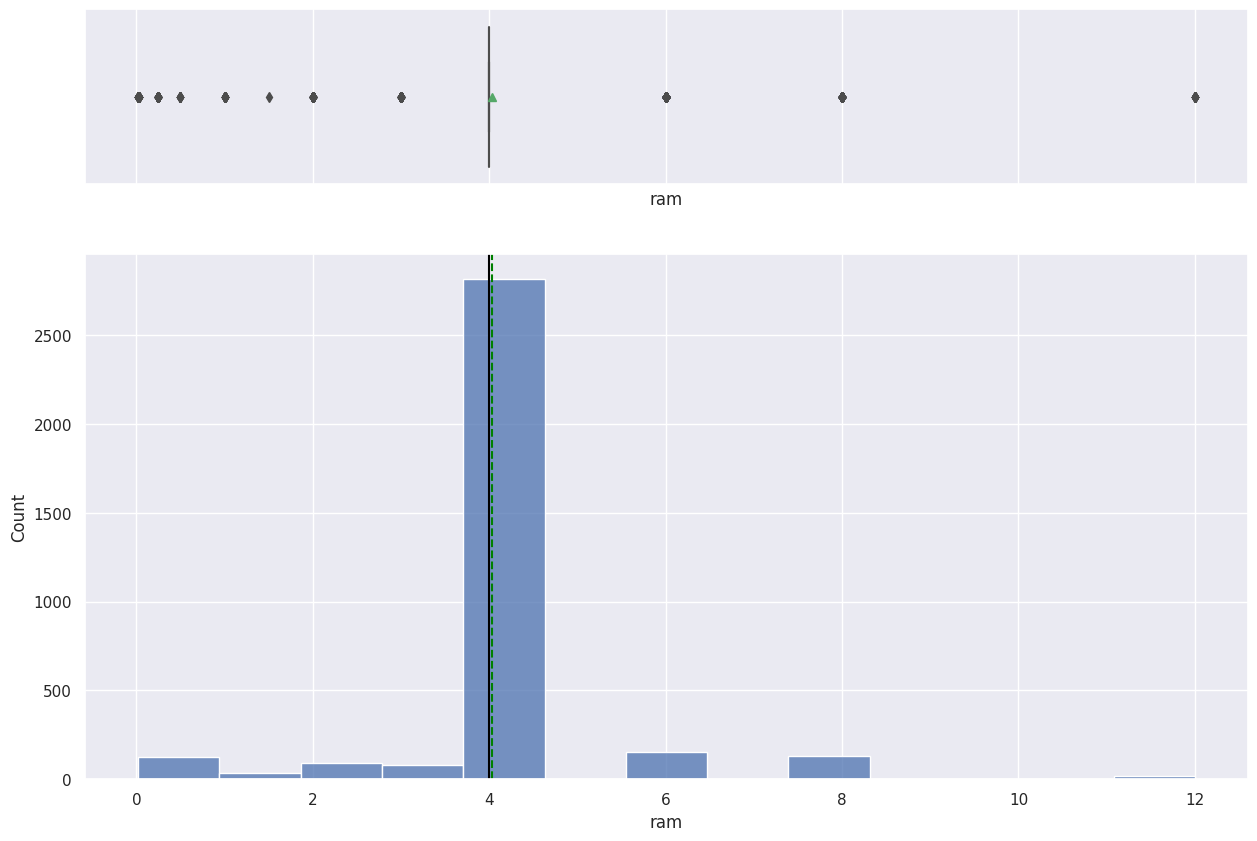

In [33]:
hist_box(data_1,"ram")

**`battery`**

The distribution for the battery is just a little skewed towards right with numerous outliers.

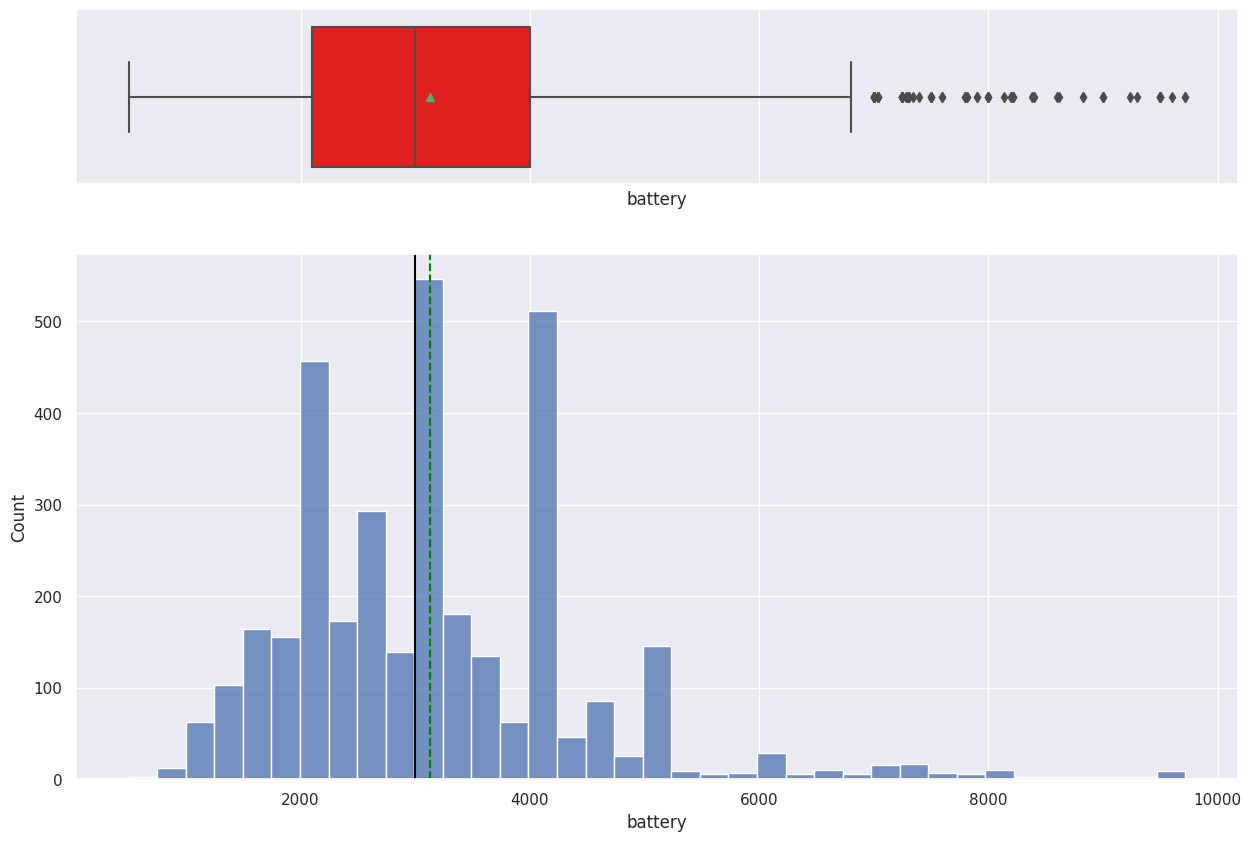

In [34]:
hist_box(data_1,"battery")

**`weight`**

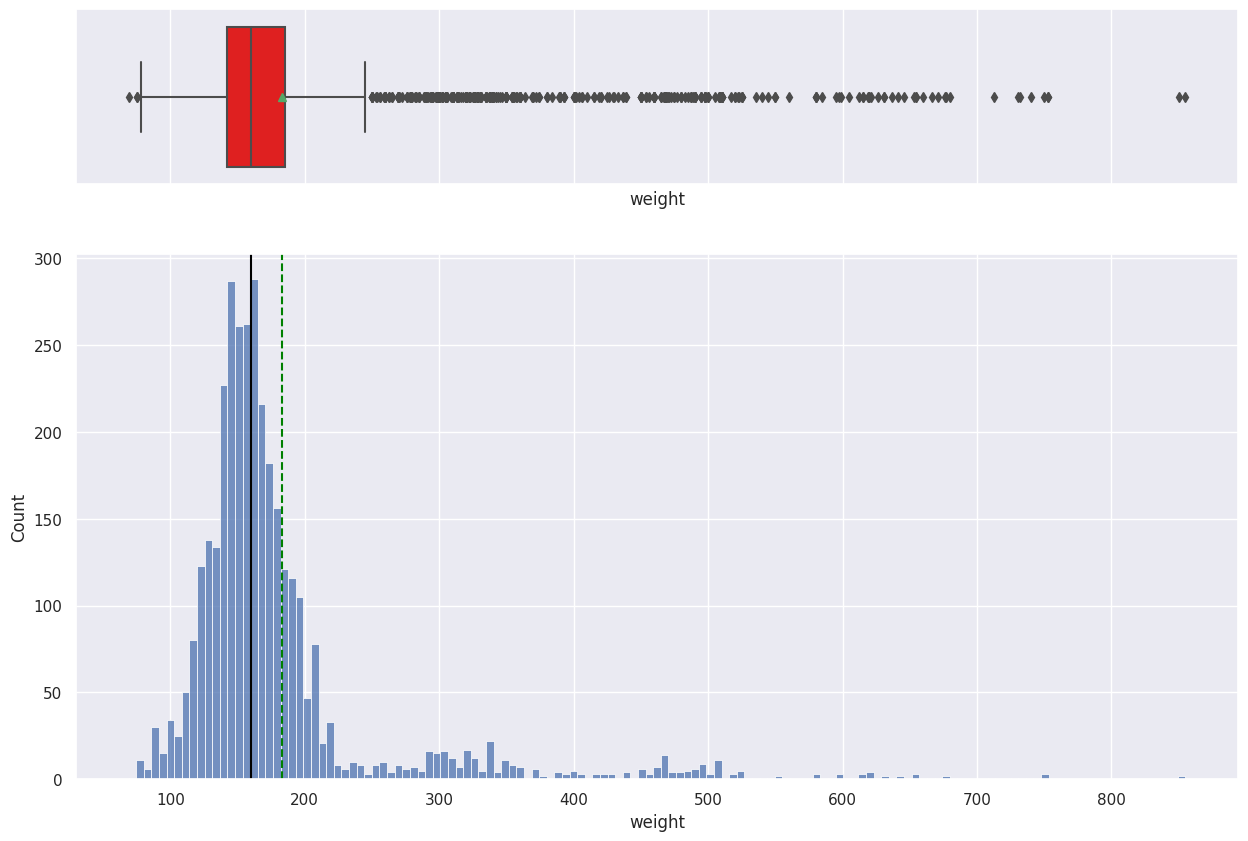

In [35]:
hist_box(data_1,"weight")

**`release_year`**

As mentioned in the prblem statement all phones are old models since 2014 to 2020.

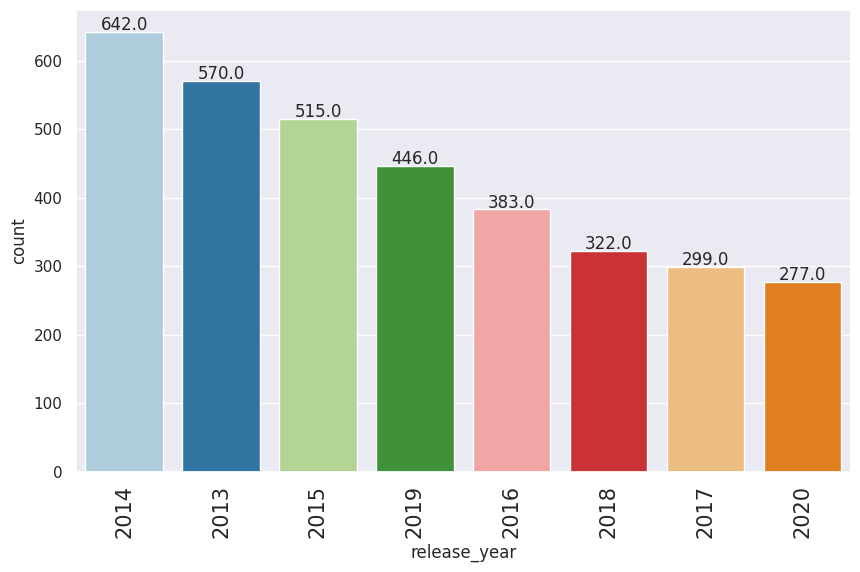

In [36]:
label_barplot(data_1,"release_year")

**`days_used`**

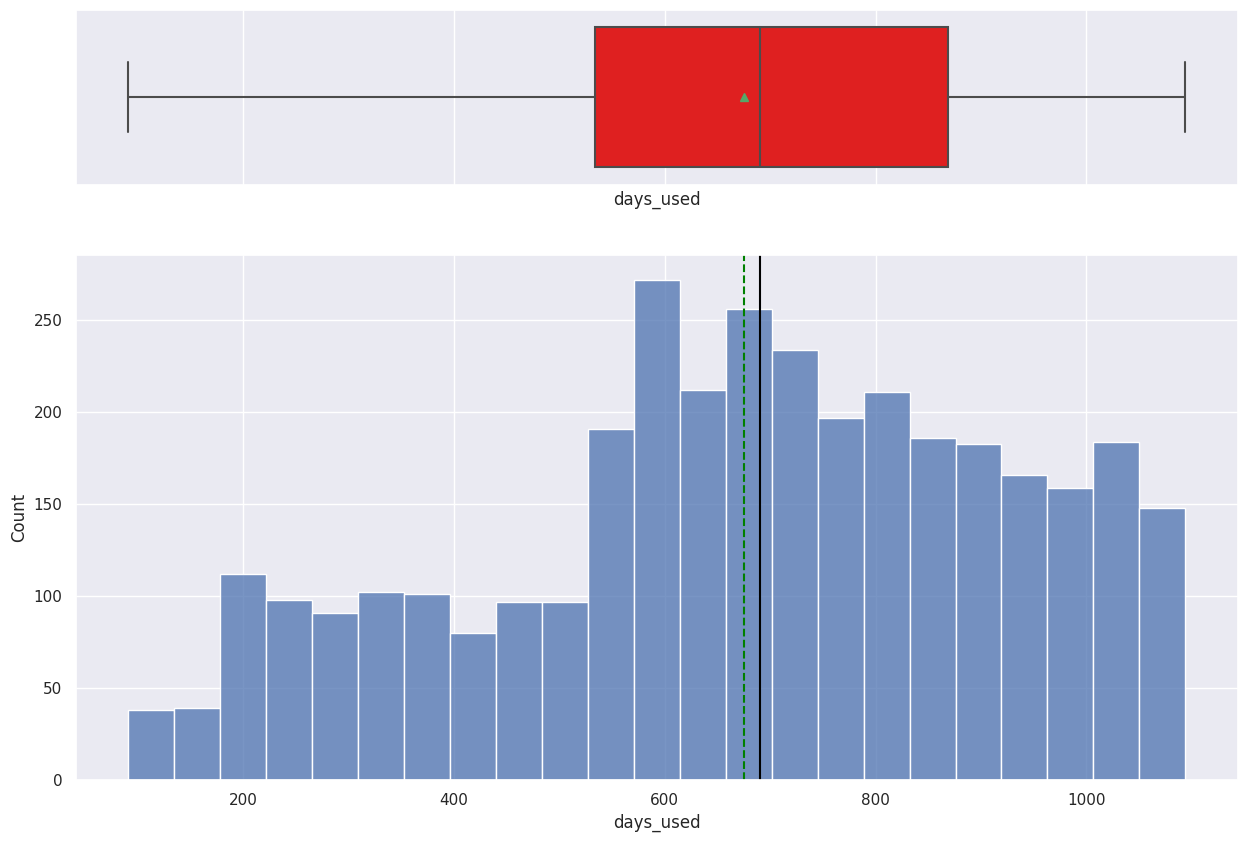

In [37]:
hist_box(data_1,"days_used")

**`normalized_used_price`**

**Question:1**What does the distribution of normalized used device prices look like?

**Answer:1** The normalized used price of the used phones are almost normally distributed with some outliers

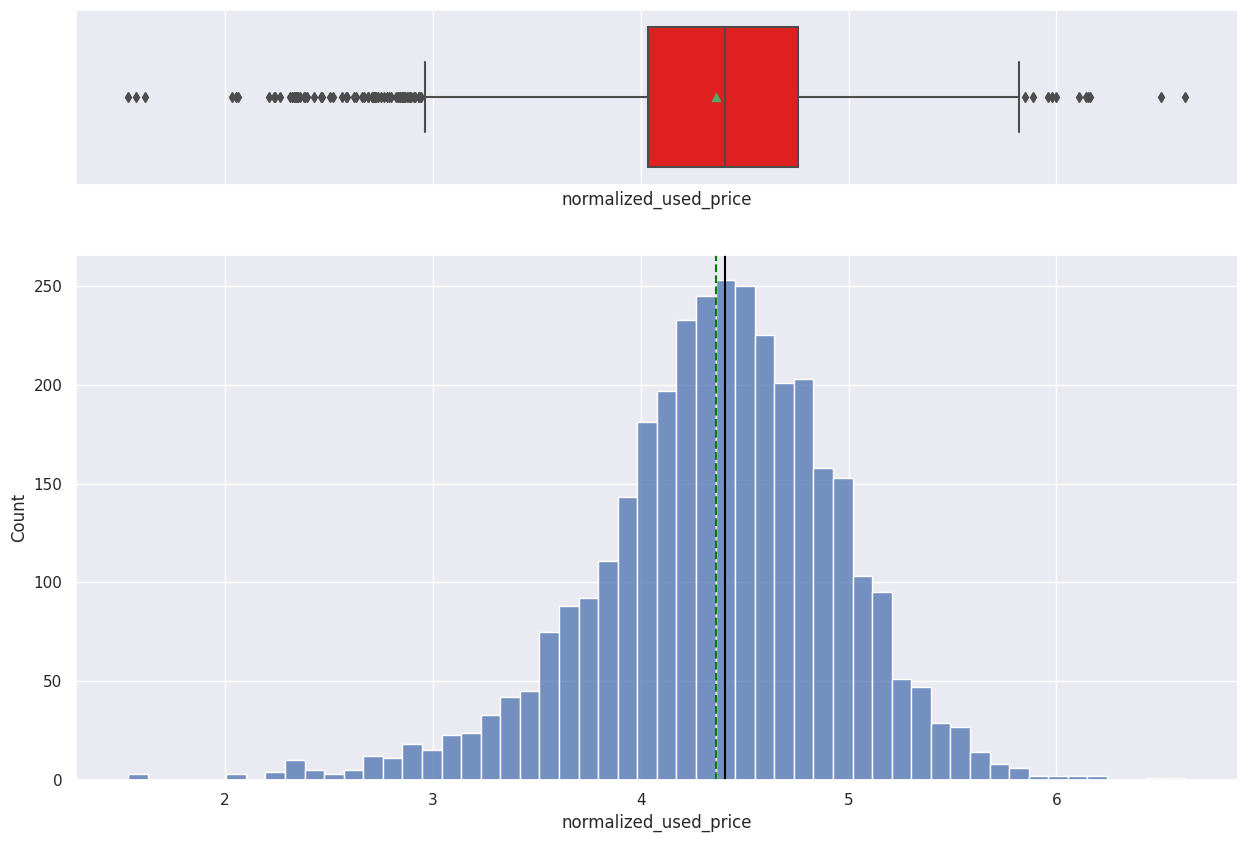

In [21]:
hist_box(data_1,"normalized_used_price")

**`normalized_new_price`**

Normalized price of the new phones are also close to normally distributed with numerous outliers, with an avaerage value of 5.25

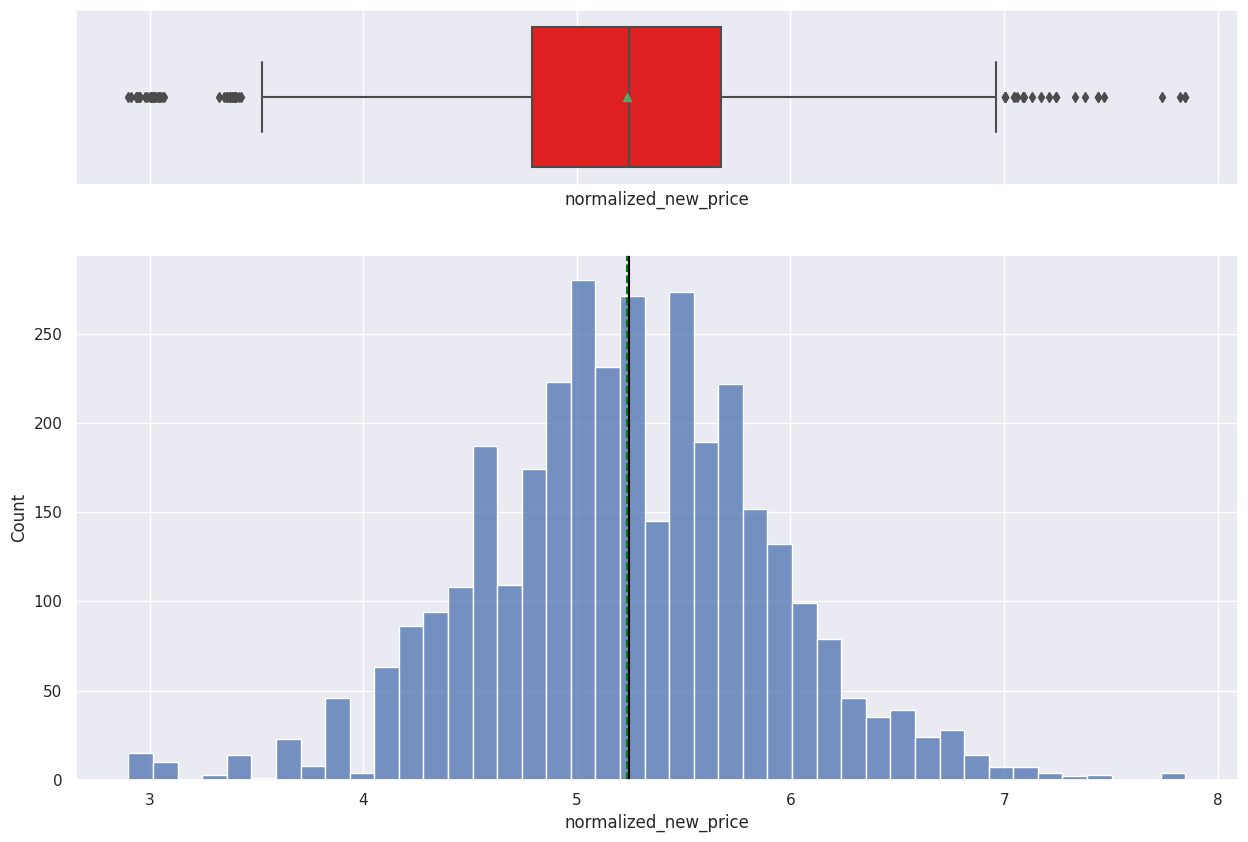

In [22]:
hist_box(data_1,"normalized_new_price")

###Bivariate Analysis

**Correlation Check**

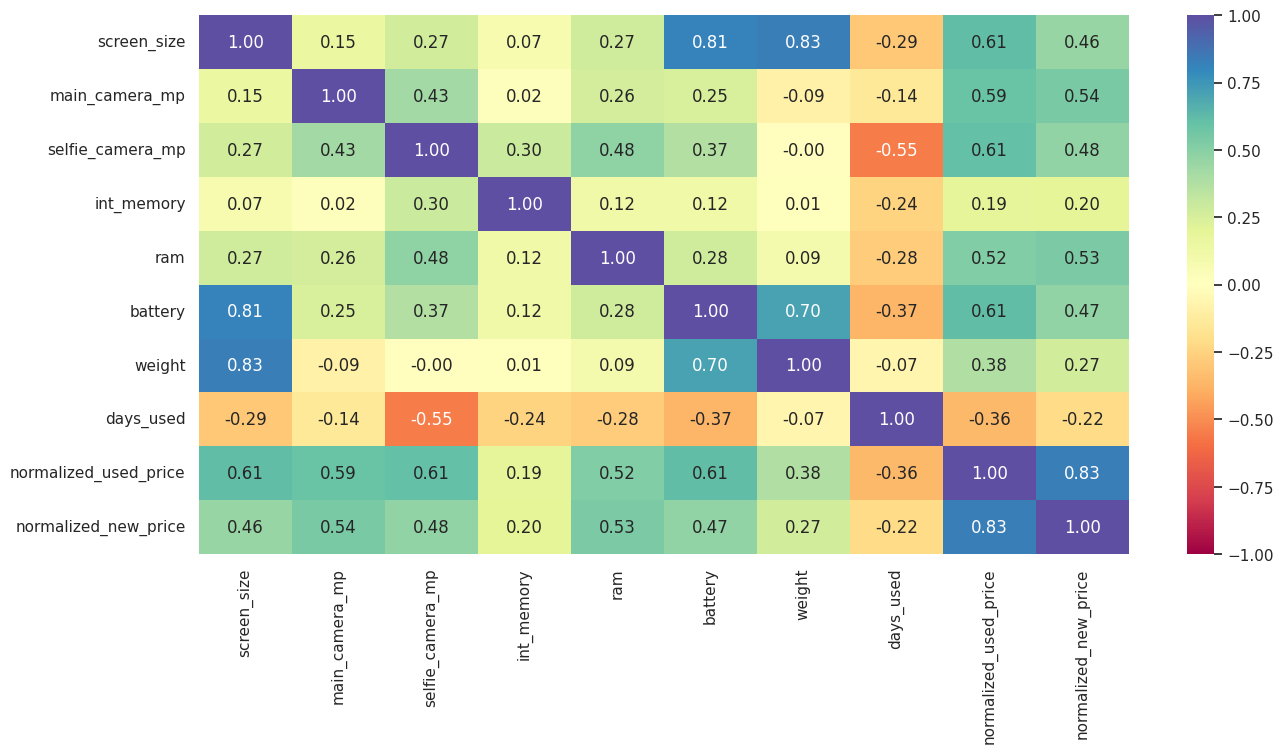

In [40]:
cols_list = data_1.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(data_1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There is a strong correlation between the battery size and weight which is undertandable, with a larger battery the weight of the device will also increase

**Plotting the RAMs of devises based on the brand names**

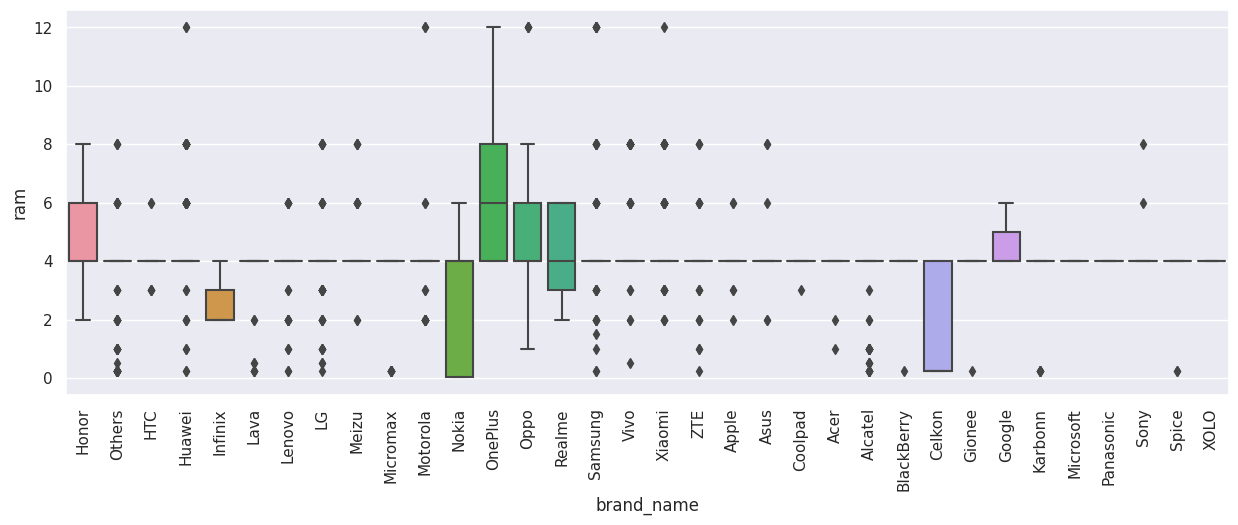

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data_1, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**Since the main variable is the normalized value of the phones,
Plotting brand names and there normalized used vales**

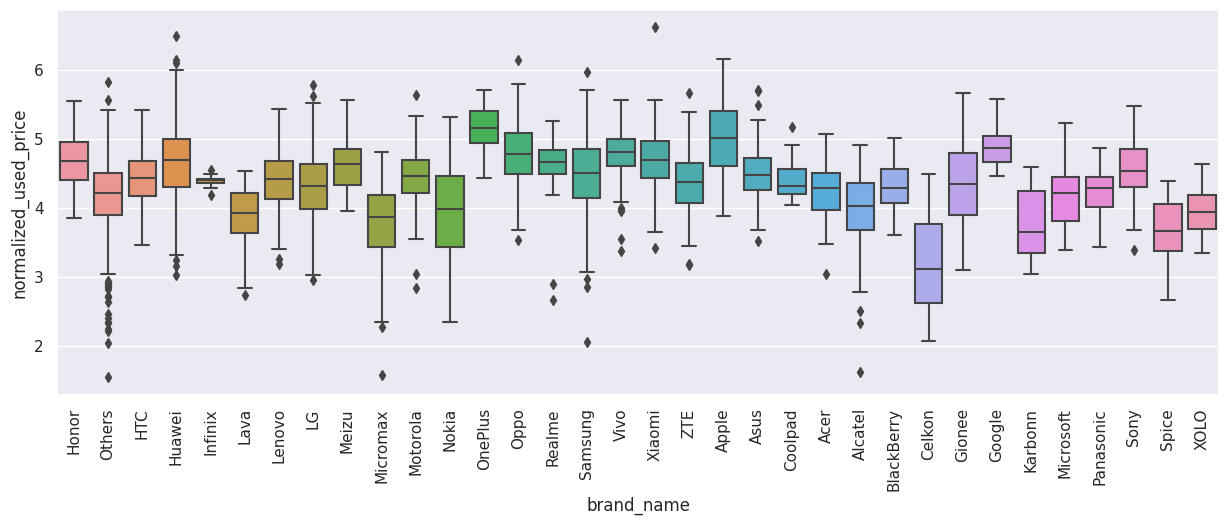

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data_1, x="brand_name", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

**Question & Answer:4**

**Large battery devices are getting more and more preferred due to their long lasting batteries through the day without charging,but due to heavy battery size the weight will also increase.Let's see the brands with battery sizes over 4000 and a plot of brands with weight for the devices containing battery over 4500 mAh**

In [142]:
data_1_big_battery = data_1[data_1.battery > 4500]
data_1_big_battery

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Samsung,Android,15.47,yes,yes,8.0,13.0,128.0,12.0,5000.0,222.0,2020,197,5.623042,6.792120
3421,Samsung,Android,15.47,yes,no,8.0,13.0,128.0,12.0,5000.0,220.0,2020,176,5.594265,6.960775
3434,Samsung,Android,15.34,yes,no,12.0,16.0,64.0,4.0,6000.0,188.0,2019,455,4.781641,5.109937
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


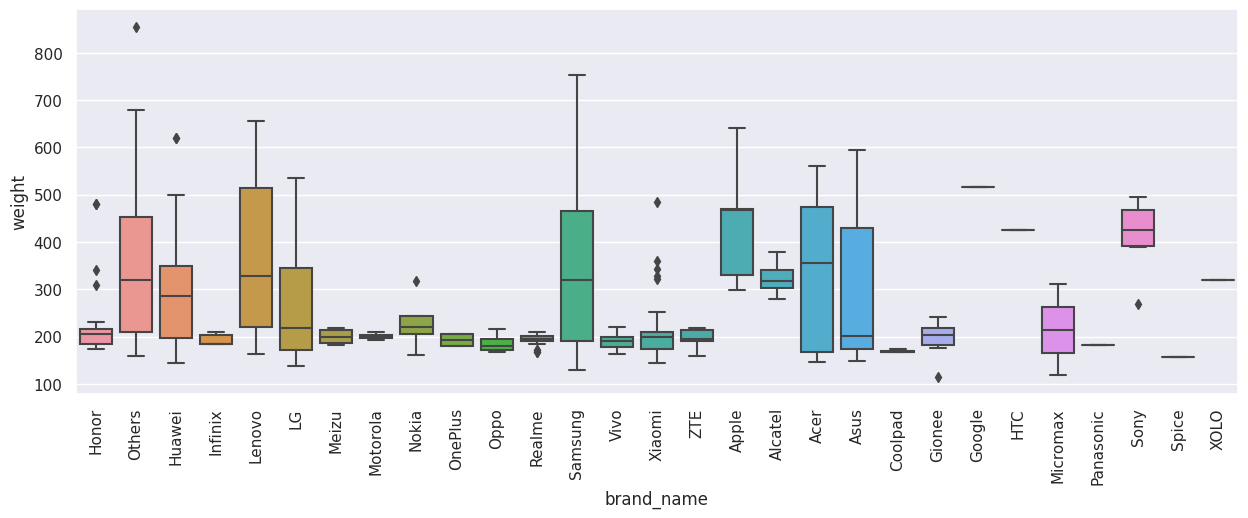

In [45]:
##Looking at the weight of the devices by brand name for the battery size more than 4000
plt.figure(figsize=(15,5))
sns.boxplot(data=data_1_big_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

**Question and Answer : 5**

**People also buy phones and tablets with bigger screen sizes. Lets see the distribution of the devices with respect to the brand and screen sizes over 6 inches**

In [143]:
data_1_big_screen = data_1[data_1.screen_size > 6*2.54]
data_1_big_screen.shape

(1099, 15)

**Question and Answer:6**

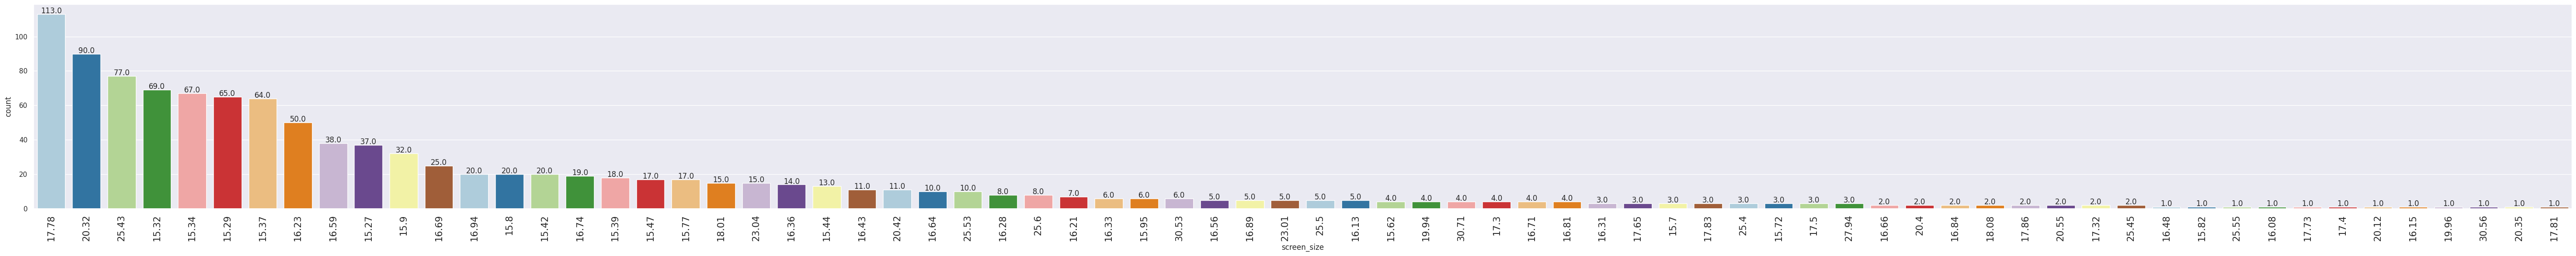

In [47]:
#Plotting the brand names with screen sizes more than 6 inches
label_barplot(data_1_big_screen,"screen_size",perc=False, n=None)

Mobile phones with higher resolution cameras are getting more popular and replacing the market of the old digital cameras. let's look at the devices with more than 8 MP for the front camera and 16 MP for rear cameras

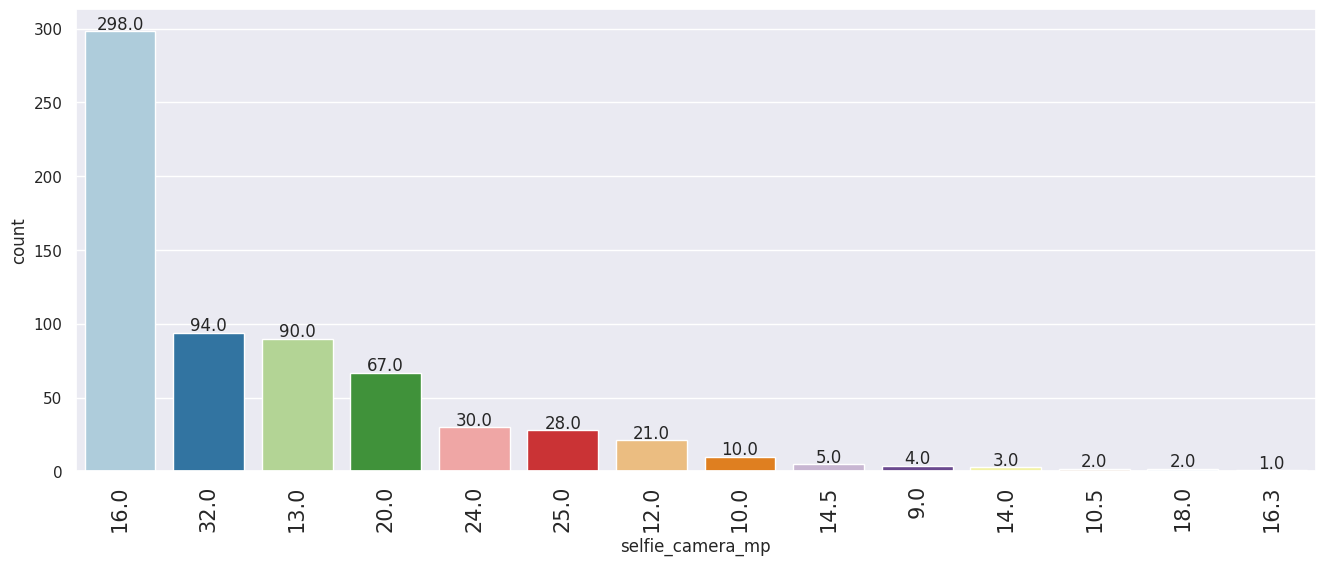

In [50]:
data_1_front_cam = data_1[data_1.selfie_camera_mp>8]
label_barplot(data_1_front_cam,"selfie_camera_mp",perc=False)

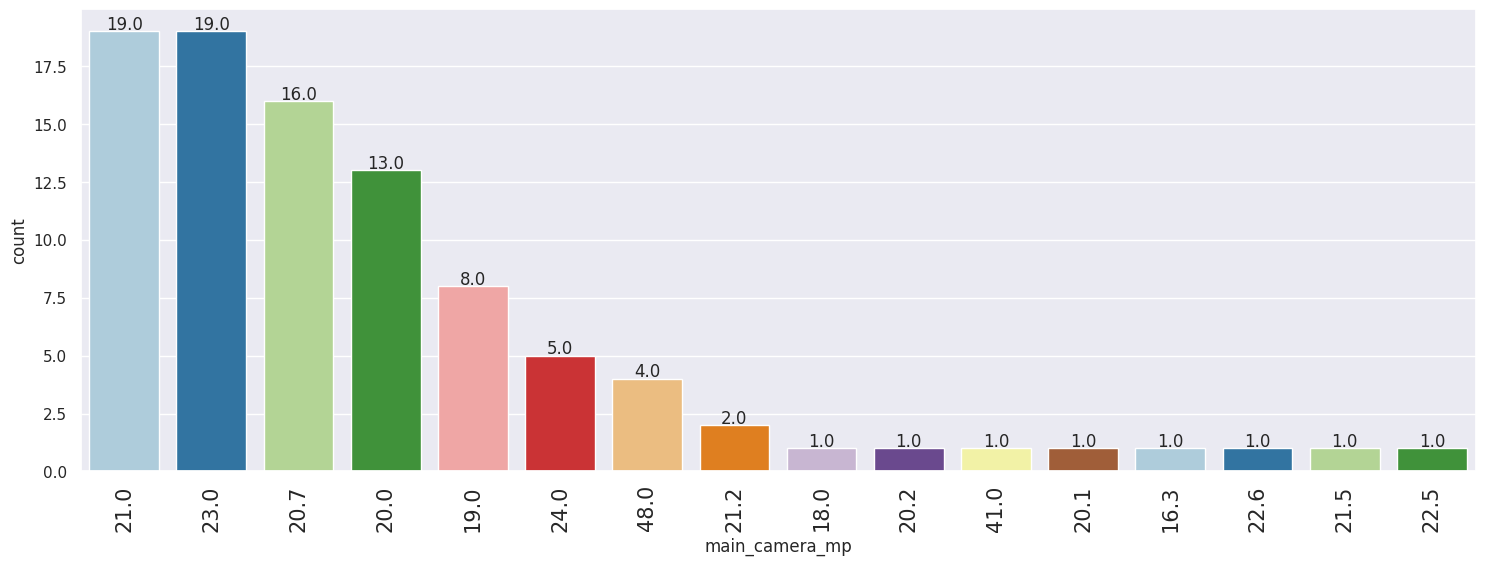

In [51]:
data_1_back_cam = data_1[data_1.main_camera_mp>16]
label_barplot(data_1_back_cam,"main_camera_mp",perc=False)

**Now the most important variable the price of used devices**

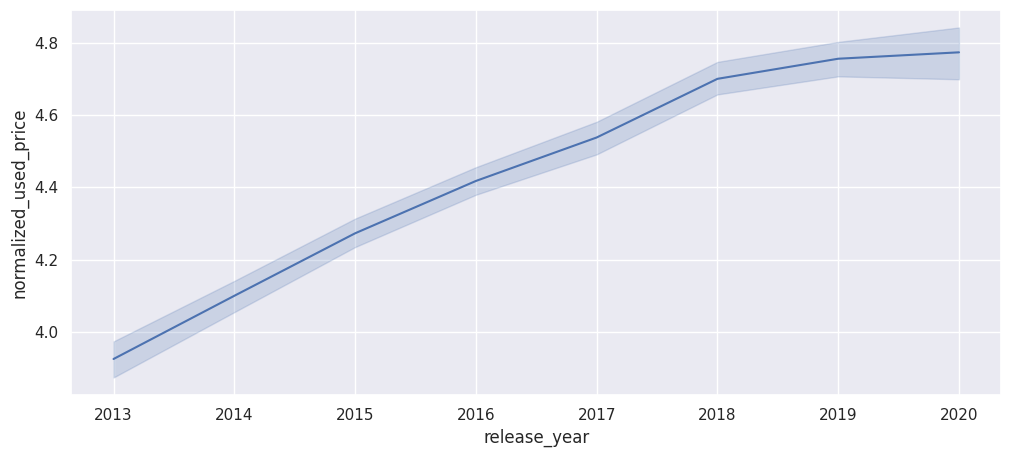

In [52]:
plt.figure(figsize=(12,5))
sns.lineplot(data=data_1,x="release_year",y="normalized_used_price")
plt.show()

**The Prices for 4g and 5g phones**

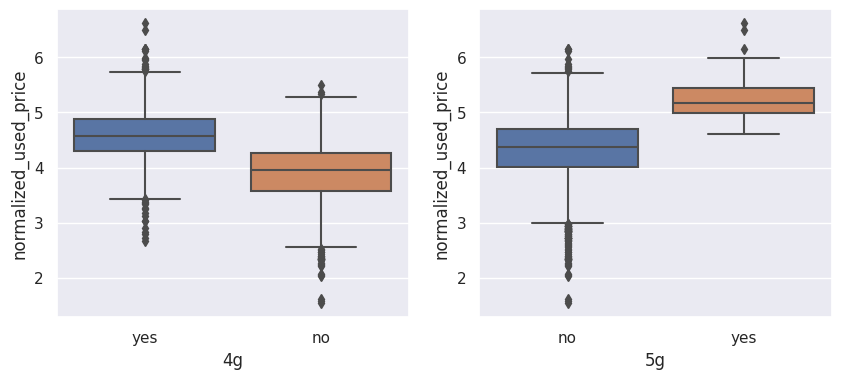

In [53]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=data_1, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=data_1, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

###Missing value treatment


*   Let's look at the missing values in each columns

In [55]:
#Creating another copy of the dataset
data_2 = data.copy()

(3454, 15)

In [59]:
#checking for missing value
data_2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

These columns have missing values and will be imputed
**`main_camera_mp`**
**`selfie_camera_mp`**
**`int_memory`**
**`ram`**
**`battery`**
**`weight`**

*  At first the values will be grouped by release year then replaced with median

In [65]:
cols_impute = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]

#the values will be imputed with median by grouping the data on release year

for col in cols_impute:
  data_2[col] = data_2[col].fillna(value=data_2.groupby(["release_year"])[col].transform("median"))

data_2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

*  Now the values will be grouped by brand name then replaced with median

In [66]:
cols_impute = ["main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]

#the values will be imputed with median by grouping the data on release year

for col in cols_impute:
  data_2[col] = data_2[col].fillna(value=data_2.groupby(["brand_name"])[col].transform("median"))

data_2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

###Feature engineering

*  Let's create a new column in the dataset named **`years_since_release`** to create a new variable to see the age of the device

In [68]:
data_2["years_since_release"] = 2021 -data_2["release_year"]
data_2.drop("release_year", axis=1, inplace=True)
data_2["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

###Outlier Detection and Treatment

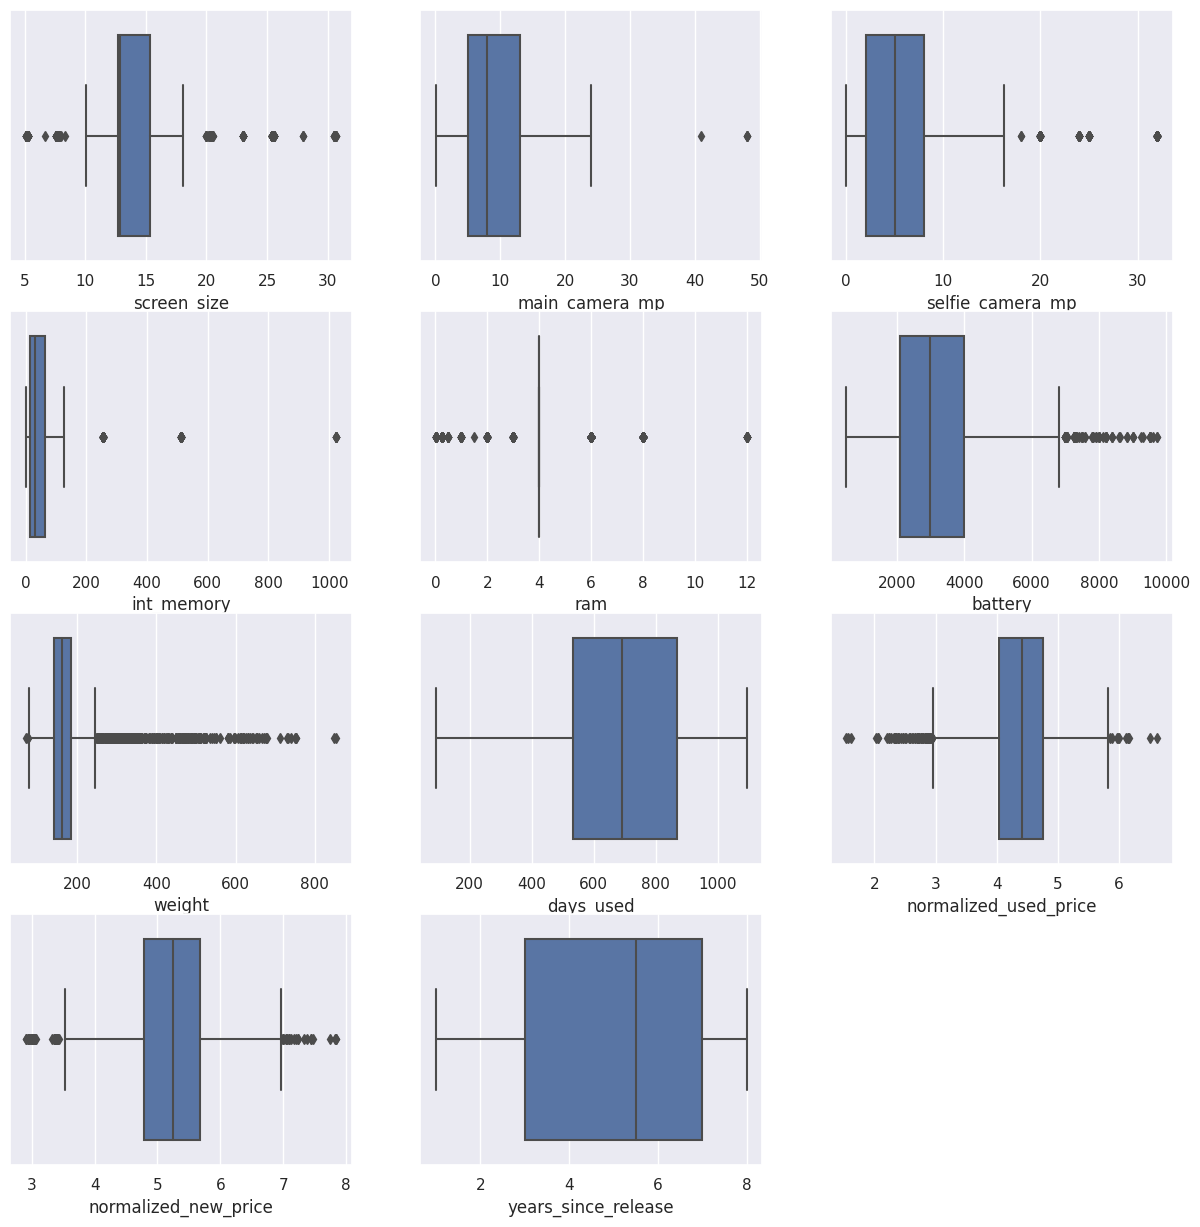

In [72]:
#Lets use the boxplot to see the outliers
num_cols = data_2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,15))

for i,variable in enumerate (num_cols):
  plt.subplot(4, 3,i + 1)
  sns.boxplot(data=data_2, x=variable)


plt.show()

###Preparing data for modeling


*  We will be defining the dependent variables and the independent variable(**`normalized_used_price`**)
*  Let's split the data in the train and test data

In [77]:
#Lets define the dependent and independent variables
X = data_2.drop(["normalized_used_price"], axis=1)
y = data_2["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [78]:
#adding intercept constant
X = sm.add_constant(X)

In [80]:
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object","category"]).columns.tolist(),drop_first=True)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [82]:
#Splitting the train data and test data in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=1)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [83]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     268.1
Date:                   Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                           02:45:33   Log-Likelihood:                 121.53
No. Observations:                   2417   AIC:                            -145.1
Df Residuals:                       2368   BIC:                             138.7
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


###Regression Results

1.   **Adjusted R-squared** :
     
 -  The Adj. R-squared is ranged between 0 to 1, with higher values denoting best fit of the model.
 -  Here the value is 0.845 which means the model is really good fit

2.   **Constant Coeffecient**
  - The value of the constant is 1.329



## Model Performance Check

###**Checking the model performance using different metrics.**

In [86]:
#function to calculate adj R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute Mean absolute percentage error
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse,"MAE": mae,"R-squared": r2,"Adj. R-squared": adjr2,"MAPE": mape},index=[0])

    return df_perf

In [87]:
#Checking the model performace on train data (70% of the data) which we built our model on so the Adj. R-squared should be 0.841 as shown in summary
print("Training Performance\n")
olsmodel_train_perf = model_performance(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.230105,0.180571,0.844587,0.84137,4.332694


In [89]:
#Checking the model performace on testing data (30% of the data)
olsmodel_test_perf = model_performance(olsmodel, x_test, y_test)
olsmodel_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239083,0.185073,0.841519,0.833651,4.511746


**Observations**
*  The train and testing data is more comparable so the model is not overfitting.
*  The MAE is 0.18 which means we can predict the used prices with a mean error of 0.18 on the testing data.
*  The MAPE of 4.5 on the testing data suggests that we are able to predict the used prices with 4.5% error on the test data.

## Checking Linear Regression Assumptions

### Let's check the model for the following linear regression assumptions

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity


####Test for Multicollinearity

**Checking the multicollinearity using VIF (Variation Inflation Factor)**
* If VIF is 1 to 5 then there is very low correlation between the kth predictor variable and other predictor variables
* If VIF is between 5 to 10 then there is moderate multicollinearity
* If VIF is 10 or more then there is high multicollinearity

In [100]:
#defining the function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


def check_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [101]:
check_vif(x_train)

,feature,VIF
0,const,228.926905
1,screen_size,7.681828
2,main_camera_mp,2.201190
3,selfie_camera_mp,2.811591
4,int_memory,1.361251
5,ram,2.239531
6,battery,4.042104
7,weight,6.372828
8,days_used,2.668030
9,normalized_new_price,3.144145


* There are total  columns have very high VIF values which shows multicollinearity
*We will drop the variables with VIF more than 5
*Let's also ignore the VIF values for dummy variable and the constant

**Defining a function to remove the columns with VIF more than 5 and checking adj. R squared one by one**

In [113]:
def treat_multicollinearity(predictors,target,high_vif_columns):

  adj_r2= []
  rmse = []
  for cols in high_vif_columns:
      train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

      olsmod = sm.OLS(target, train).fit()
      adj_r2.append(olsmodel.rsquared_adj)
      rmse.append(np.sqrt(olsmodel.mse_resid))

  temp = pd.DataFrame({"col":high_vif_columns,"Adj.R-squared after droping col":adj_r2,"RMSE after droping col":rmse}).sort_values(by="Adj.R-squared after droping col",ascending = False)
  temp.reset_index(drop=True, inplace=True)
  return temp

In [115]:
#lets see if we drop brand_name_apple column and os_iOS
col_list = ["brand_name_Apple", "os_iOS"]
new_r = treat_multicollinearity(x_train,y_train,col_list)
new_r

,col,Adj.R-squared after droping col,RMSE after droping col
0,brand_name_Apple,0.841437,0.232474
1,os_iOS,0.841437,0.232474


In [117]:
#let's drop these brand name Apple from the dataset
col_to_drop = "brand_name_Apple"
x_train2 = x_train.loc[
    :, ~x_train.columns.str.startswith(col_to_drop)
]  # To specify the train data from which to drop the column specified
x_test2 = x_test.loc[
    :, ~x_test.columns.str.startswith(col_to_drop)
]  # To specify the test data from which to drop the column specified

# Check VIF now
vif = check_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,228.462657
1,screen_size,7.648123
2,main_camera_mp,2.200257
3,selfie_camera_mp,2.790344
4,int_memory,1.361239
5,ram,2.231603
6,battery,4.040095
7,weight,6.370262
8,days_used,2.667499
9,normalized_new_price,3.127637


In [118]:
#let's drop os_iOS from the dataset
col_to_drop = "os_iOS"
x_train2 = x_train.loc[
    :, ~x_train.columns.str.startswith(col_to_drop)
]  # To specify the train data from which to drop the column specified
x_test2 = x_test.loc[
    :, ~x_test.columns.str.startswith(col_to_drop)
]  # To specify the test data from which to drop the column specified

# Check VIF now
vif = check_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


,feature,VIF
0,const,227.771185
1,screen_size,7.612950
2,main_camera_mp,2.197797
3,selfie_camera_mp,2.801304
4,int_memory,1.361251
5,ram,2.225101
6,battery,4.038255
7,weight,6.355004
8,days_used,2.667684
9,normalized_new_price,3.144145


*We still have columns with high VIF like screen size and weight
let's see what will happen if we drop it

In [119]:

col_list_1= ["screen_size", "weight"]

# To check the effect on model performance after dropping specified columns from train data
new_r1 = treat_multicollinearity(x_train, y_train, col_list_1)
new_r1

,col,Adj.R-squared after droping col,RMSE after droping col
0,screen_size,0.841437,0.232474
1,weight,0.841437,0.232474


In [120]:
#lets drop these 2 variables

col_to_drop = "screen_size"
x_train2 = x_train.loc[
    :, ~x_train.columns.str.startswith(col_to_drop)
]
x_test2 = x_test.loc[
    :, ~x_test.columns.str.startswith(col_to_drop)
]


vif = check_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,203.877231
1,main_camera_mp,2.197986
2,selfie_camera_mp,2.808155
3,int_memory,1.359116
4,ram,2.239531
5,battery,3.805616
6,weight,2.960856
7,days_used,2.656096
8,normalized_new_price,3.102312
9,years_since_release,4.724063


In [121]:
#Dropping weight
col_to_drop = "weight"
x_train2 = x_train.loc[
    :, ~x_train.columns.str.startswith(col_to_drop)
]
x_test2 = x_test.loc[
    :, ~x_test.columns.str.startswith(col_to_drop)
]


vif = check_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,209.810988
1,screen_size,3.569025
2,main_camera_mp,2.113638
3,selfie_camera_mp,2.787236
4,int_memory,1.361174
5,ram,2.237428
6,battery,3.657696
7,days_used,2.654726
8,normalized_new_price,3.141092
9,years_since_release,4.716474


In [123]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     266.6
Date:                   Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                           04:05:32   Log-Likelihood:                 93.904
No. Observations:                   2417   AIC:                            -91.81
Df Residuals:                       2369   BIC:                             186.1
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


* The adjusted R-squared value is same 0.841 which means the columns that we dropped did not have any effect on the model

####Dropping the high-P variables
We will drop the predictor variables having a p-value higher than 0.05 as they do not significantly impact the target variable
Since the elimination of one predictor variable changes other predictor variable's p-value we will not be dropping it all together instead we will build a function that checks the p-values of the predictor variables one by one if we drop thm

In [124]:

predictors = x_train2.copy()  # making a copy of the training data set after droping high VIF variables
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:

    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


We have removed all the variables with p-value of 0.05

In [125]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [126]:
olsmod_new = sm.OLS(y_train,x_train3).fit()
print(olsmod_new.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1253.
Date:                   Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                           04:14:01   Log-Likelihood:                 78.023
No. Observations:                   2417   AIC:                            -134.0
Df Residuals:                       2406   BIC:                            -70.35
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [128]:
#lets' check the new model on the testing data
olsmod_new_test_perf = model_performance(olsmod_new,x_test3,y_test)
olsmod_new_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23916,0.185482,0.841417,0.839716,4.515572


**Observations on the new model**
* NO variable has p-value higher than 0.05
* The new R-squared adjusted is 0.838, which means our model predicts 84% of the variance.
*RMSE and MAE values are comparabel between test and train data therfore the model is not overfitting

####**Let's check the assumptions of linear regression**

#####Test for Linearity and Independance
- Checking the linearity and independence between fitted values vs residuals and checking for patterns
*If we see any pattern then the model is linear and the residuals are independent

In [129]:
df_ind = pd.DataFrame()

df_ind["Actual Values"] = y_train  # actual values
df_ind["Fitted Values"] = olsmod_new.fittedvalues  # predicted values
df_ind["Residuals"] = olsmod_new.resid  # residuals

df_ind.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.859402,0.228085
1525,4.448399,4.620980,-0.172581
1128,4.315353,4.278972,0.036380
3003,4.282068,4.251153,0.030915
2907,4.456438,4.446164,0.010274


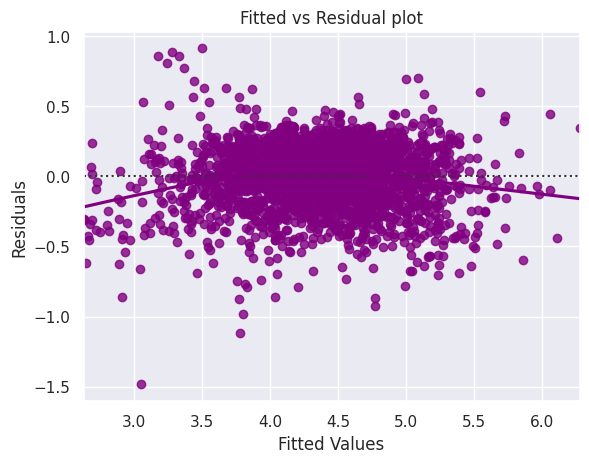

In [131]:
sns.residplot(data=df_ind, x="Fitted Values", y ="Residuals", color="Purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**As we can see in the plot above there is no pattern exist therefore the assumption of linearity and independence are satisfied**

#####**Test for Normality**
* Using Q-Q plots of the residuals and by using shapiro-wilke's test we can check the normality
* If there is a normal plot for the residuals and a straight line for Q-Q test then the  assumption is satisfied

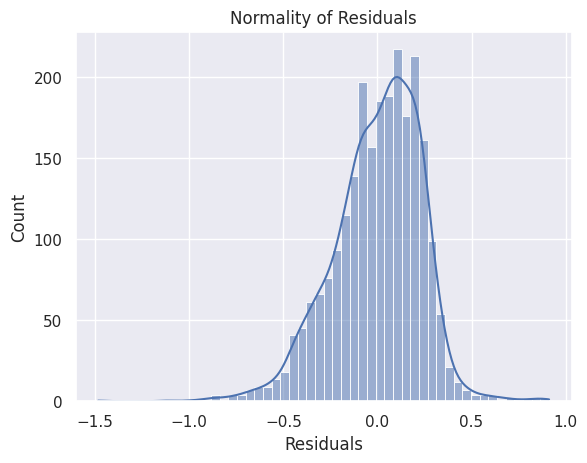

In [132]:
sns.histplot(data=df_ind,x="Residuals",kde=True)
plt.title("Normality of Residuals")
plt.show()

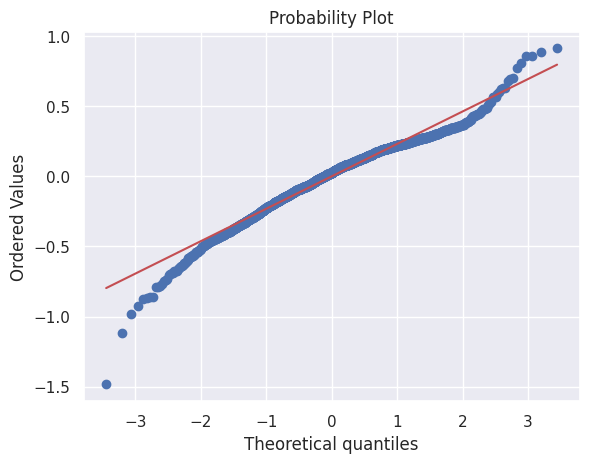

In [133]:
#lets plot Q-Q test
import pylab
import scipy.stats as stats
stats.probplot(df_ind["Residuals"], dist="norm",plot=pylab)
plt.show()

In [134]:
#shapiro Wilk's test
stats.shapiro(df_ind["Residuals"])

ShapiroResult(statistic=0.9732199907302856, pvalue=7.168305990912624e-21)

**As we can see from all the graphs**
* The residuals are normal and the Q-Q plot is almost a straight line therefore our assumption for normality is satisfied
* Also, the p-vlaue is also very smaller than 0.05

#####**Test for Homoscedasticity**
* We will use goldfeldquand test for homoscedasticity
* If the p-value is higher than 0.05 we can say that the residuals are homoscedastic, if not they are heteroscedastic

In [136]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(
    df_ind["Residuals"], x_train3
)  # This is for the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0532881609106415), ('p-value', 0.18457615005515474)]

The p-value is higher than 0.05 therefore the residuals are homoscedastic.

#####**Test for Data predictions**

In [137]:
pred = olsmod_new.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.363917
2341,3.696103,3.942493
1913,3.592093,3.767825
688,4.306495,4.116511
650,4.522115,5.118466
2291,4.259294,4.389535
40,4.997685,5.427173
1884,3.875359,4.092314
2538,4.206631,4.051194
45,5.380450,5.309504


As we can see our model is returning the prediciton results with the actual values being comparable.

## Final Model

Let's Look at our model again

In [138]:
print(olsmod_new.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1253.
Date:                   Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                           04:43:09   Log-Likelihood:                 78.023
No. Observations:                   2417   AIC:                            -134.0
Df Residuals:                       2406   BIC:                            -70.35
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [139]:
# Let's check the model on training data (70% of the data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance(olsmod_new, x_train3, y_train)

olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234284,0.1835,0.838891,0.838154,4.399782


In [141]:
# checking model performance on test set (30% of the data)
print("Testing Performance\n")
olsmodel_final_test_perf = model_performance(olsmod_new, x_test3, y_test)  # To check the performance on train data
olsmodel_final_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23916,0.185482,0.841417,0.839716,4.515572


As shown here
* The training data and testing data have low RMSE and MAE. Which means are model is not overfitted
* The adjusted r-squared is nearly 0.84, which means our model is able to explain 84% of the variation in the data
* We can safley say that the olsmod_new is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

* As stated above the model is able to explain ~84% of the variation in the data and within 4.5% of the normalized used prices on the test data, which is good.
 - Above statement proves that the model is good for prediction and inference.
* From the model it is visible that as the device is getting older (meaning each year passes from the release year), the used price is decreased by 0.0153 units,assuming all other variables constant.
* Since there was significant multicollinearity by Apple Brand and iOS, it is recommended to conduct a separate analysis with performance metrics present for training data.
* The phone's main back camera has a positive increase on the used price. As the camera MP increase the price will increase by 0.0188 units, Assuming all other variables are constant.
* The device's screen size has also a positive relation between the used phone price. If the screen size is increased by 1 unit, then the used price is increased by 0.0431 units.Assuming all the other variables are constant.

* Same goes for device's selfie camera megapixels. An increase by one unit,the price of used phone will increase by 0.0129 units, Assuming all other variables are constant.

* The prices of brand new and old phones continue to rise up, it is because of the economic inflation and increase in the customer usage. Recell can provide some promotional marketing offers on the reliable used phones to grow the company.

___